In [1]:
from sklearn.cluster import KMeans
from semi_supervised_clustering import *

In [2]:
x_train, y_train, x_test, y_test = mnist_data(categorical=True)
# percentages = [0.01, 0.05, 0.1, 0.2, 0.5]
labeled_data, labeled_labels, unlabeled_data, unlabeled_labels = prepare_labeled_data(x_train, y_train, percentage=0.5)
X = np.concatenate((labeled_data, unlabeled_data), axis=0)
label_assignments = list(labeled_labels) + list(unlabeled_labels)

In [3]:
print(X.shape)
print(len(labeled_data), len(labeled_labels))
print(set(labeled_labels), set(y_train))

(6000, 784)
3000 3000
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# trival

In [15]:
kmeans = KMeans(n_clusters=10, random_state=0)  # assuming 3 clusters
kmeans.fit(X)
cluster_assignments, centroids = kmeans.labels_, kmeans.cluster_centers_

In [16]:
print(cluster_assignments[600:700])

[4 7 7 4 7 4 7 4 4 4 7 4 7 7 4 4 7 7 7 4 7 4 7 6 6 6 6 8 4 0 7 6 0 4 7 6 6
 6 8 6 6 4 6 6 6 6 0 6 0 5 4 6 6 0 6 9 7 6 6 6 6 6 0 6 6 6 6 5 6 6 6 4 6 7
 6 6 6 6 6 0 6 4 6 6 6 7 0 6 6 6 6 6 7 6 6 2 0 6 6 6]


/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


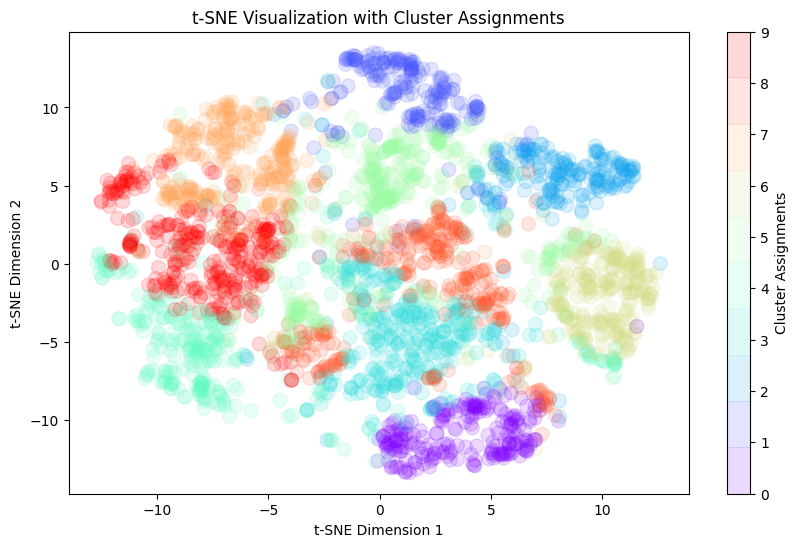

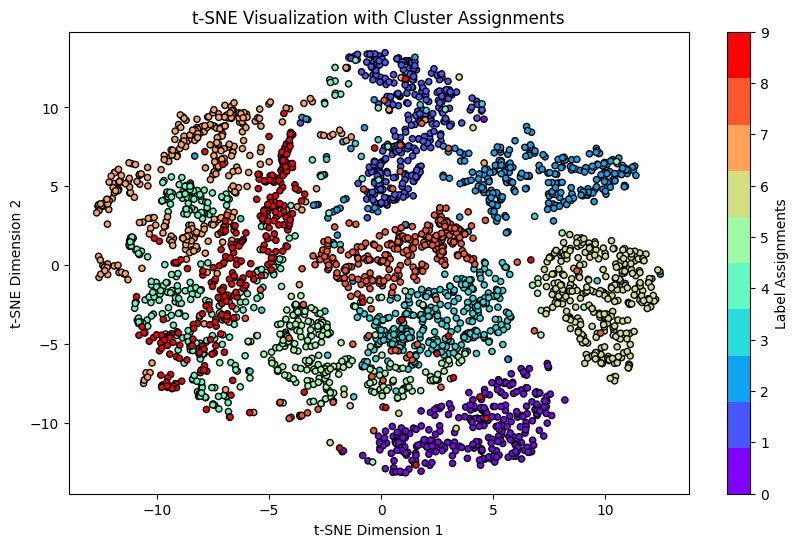

In [17]:
CopKMean.scatter_cluster_points_with_labeled(X, label_assignments, cluster_assignments, n_labeled=len(labeled_labels), n_samples=6000, split=True)

# semi-supervised

In [7]:
Method = CopKMean
must_link, cannot_link = Method.labels_to_constraints(labeled_labels)
# Method = CopKMean_Behrouz
# must_link, cannot_link = Method.label_to_constraints(labeled_labels, len(X))
cluster_assignments, centroids = Method.fit_transform(X, 10, must_link, cannot_link, initialization='kmpp', verbose=True)

assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]


initializing centroids...


assign cluster index:   3%|▎         | 174/6000 [00:00<00:03, 1734.93it/s]


updated centroids with total distance as: 68.0/6.74e-06


assign cluster index:   3%|▎         | 167/6000 [00:00<00:03, 1662.30it/s]


updated centroids with total distance as: 10.7/6.74e-06


assign cluster index:   2%|▏         | 122/6000 [00:00<00:04, 1214.03it/s]


updated centroids with total distance as: 5.76/6.74e-06


assign cluster index:   3%|▎         | 170/6000 [00:00<00:03, 1693.87it/s]


updated centroids with total distance as: 2.66/6.74e-06


assign cluster index:   3%|▎         | 182/6000 [00:00<00:03, 1811.89it/s]

updated centroids with total distance as: 0.982/6.74e-06



assign cluster index:   2%|▏         | 149/6000 [00:00<00:03, 1483.02it/s]


updated centroids with total distance as: 0.609/6.74e-06


assign cluster index:   3%|▎         | 164/6000 [00:00<00:03, 1632.90it/s]


updated centroids with total distance as: 0.47/6.74e-06


assign cluster index:   3%|▎         | 172/6000 [00:00<00:03, 1711.30it/s]


updated centroids with total distance as: 0.306/6.74e-06


assign cluster index:   3%|▎         | 158/6000 [00:00<00:03, 1575.66it/s]


updated centroids with total distance as: 0.304/6.74e-06


assign cluster index:   2%|▏         | 128/6000 [00:00<00:04, 1276.00it/s]


updated centroids with total distance as: 0.291/6.74e-06


assign cluster index:   3%|▎         | 151/6000 [00:00<00:03, 1508.24it/s]


updated centroids with total distance as: 0.281/6.74e-06


assign cluster index:   3%|▎         | 160/6000 [00:00<00:03, 1595.70it/s]


updated centroids with total distance as: 0.294/6.74e-06


assign cluster index:   2%|▏         | 138/6000 [00:00<00:04, 1377.13it/s]


updated centroids with total distance as: 0.255/6.74e-06


assign cluster index:   2%|▏         | 131/6000 [00:00<00:04, 1305.08it/s]


updated centroids with total distance as: 0.102/6.74e-06


assign cluster index:   3%|▎         | 170/6000 [00:00<00:03, 1694.01it/s]


updated centroids with total distance as: 0.124/6.74e-06


assign cluster index:   2%|▏         | 145/6000 [00:00<00:04, 1445.97it/s]


updated centroids with total distance as: 0.116/6.74e-06


assign cluster index:   2%|▏         | 135/6000 [00:00<00:04, 1334.51it/s]


updated centroids with total distance as: 0.0769/6.74e-06


assign cluster index:   2%|▏         | 142/6000 [00:00<00:04, 1418.49it/s]


updated centroids with total distance as: 0.0216/6.74e-06


iterations:   6%|▌         | 18/300 [00:37<09:51,  2.10s/it]

updated centroids with total distance as: 7.12e-07/6.74e-06


In [8]:
print(cluster_assignments[600:700])

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [9]:
# label_assignments = list(labeled_labels) + list(unlabeled_labels)
# Method.scatter_cluster_points_with_labeled(X, label_assignments, labeled_labels)

/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


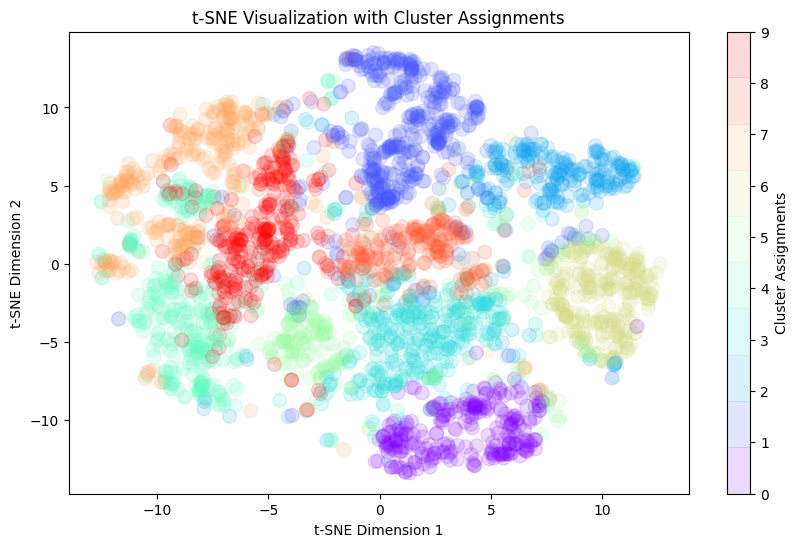

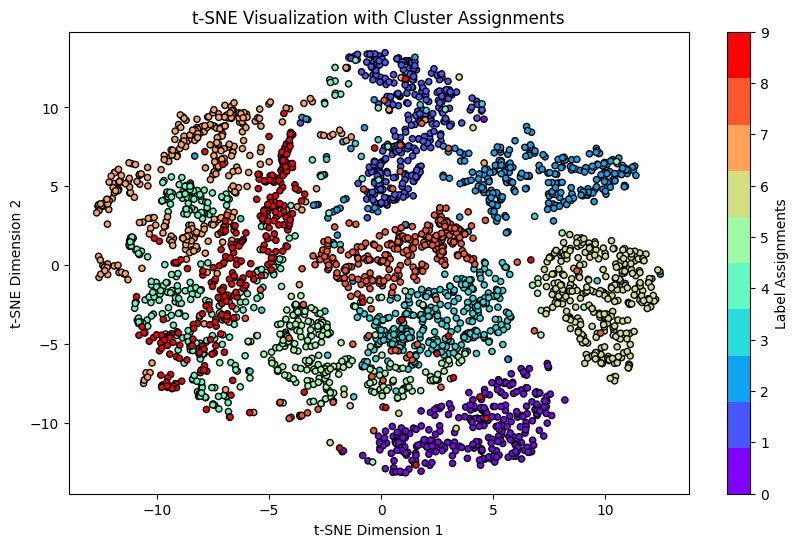

In [10]:
Method.scatter_cluster_points_with_labeled(X, label_assignments, cluster_assignments, n_labeled=len(labeled_labels), split=True)

# semi-supervised

In [11]:
Method = CopKMean_Behrouz
must_link, cannot_link = Method.labels_to_constraints(labeled_labels, len(X))
cluster_assignments, centroids = Method.fit_transform(X, 10, must_link, cannot_link, verbose=True)

initialize centroids:   0%|          | 0/9 [00:00<?, ?it/s]

optimize must_link info ...
initializing centroids...


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 66.7/6.74e-06
updated centroids with total distance as: 12.7/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 5.67/6.74e-06
updated centroids with total distance as: 2.97/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.42/6.74e-06
updated centroids with total distance as: 0.657/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.406/6.74e-06
updated centroids with total distance as: 2.67/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.45/6.74e-06
updated centroids with total distance as: 1.21/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.49/6.74e-06
updated centroids with total distance as: 2.03/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.67/6.74e-06
updated centroids with total distance as: 1.37/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.03/6.74e-06
updated centroids with total distance as: 2.93/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.71/6.74e-06
updated centroids with total distance as: 0.966/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.546/6.74e-06
updated centroids with total distance as: 3.33/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.44/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.04/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.97/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.96/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06



assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 64945.24it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06


assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 64828.79it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06


assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 65045.45it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06



assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 66984.18it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06



assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 68778.06it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06



assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 70778.00it/s]

assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 62218.03it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.964/6.74e-06
updated centroids with total distance as: 0.529/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 3.32/6.74e-06
updated centroids with total distance as: 2.15/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.46/6.74e-06
updated centroids with total distance as: 1.23/6.74e-06


assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 1.04/6.74e-06
updated centroids with total distance as: 2.96/6.74e-06


assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 68776.75it/s]

updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.974/6.74e-06



assign cluster index:   0%|          | 0/6000 [00:00<?, ?it/s]

updated centroids with total distance as: 0.524/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06


assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 68201.91it/s]

updated centroids with total distance as: 2.16/6.74e-06
updated centroids with total distance as: 1.45/6.74e-06



assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 69289.35it/s]

updated centroids with total distance as: 1.24/6.74e-06
updated centroids with total distance as: 1.05/6.74e-06



assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 68371.09it/s]

updated centroids with total distance as: 2.96/6.74e-06
updated centroids with total distance as: 1.73/6.74e-06
updated centroids with total distance as: 0.964/6.74e-06



assign cluster index: 100%|██████████| 6000/6000 [00:00<00:00, 67866.62it/s]

updated centroids with total distance as: 0.529/6.74e-06
updated centroids with total distance as: 3.32/6.74e-06



iterations: 100%|██████████| 300/300 [00:37<00:00,  8.02it/s]

updated centroids with total distance as: 2.15/6.74e-06


In [12]:
print(cluster_assignments[600:700])

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


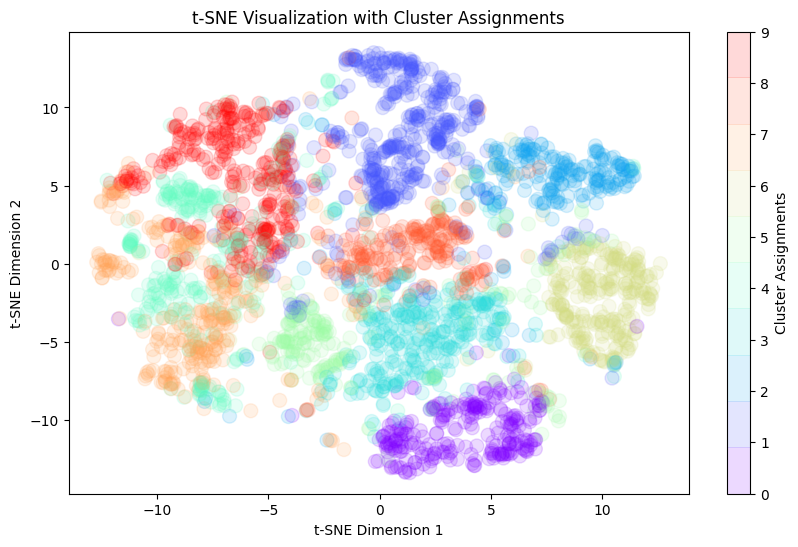

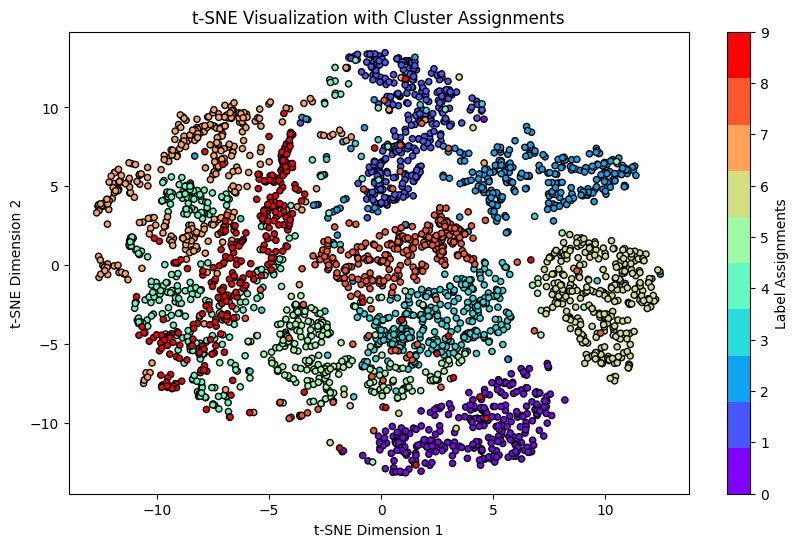

In [14]:
Method.scatter_cluster_points_with_labeled(X, label_assignments, cluster_assignments, n_labeled=len(labeled_labels), split=True)